# Common Image Segemnation Methods

In [5]:
## Loading Libraries

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

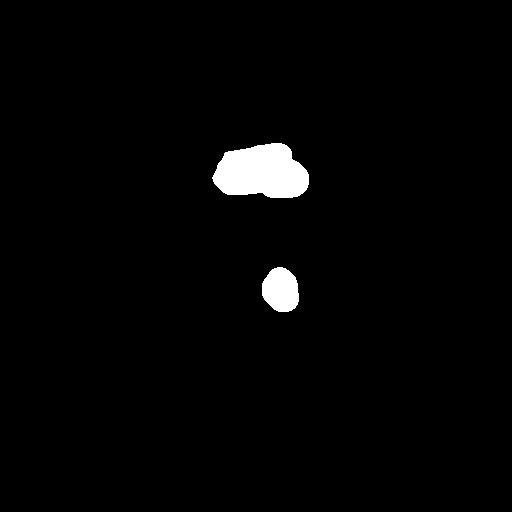

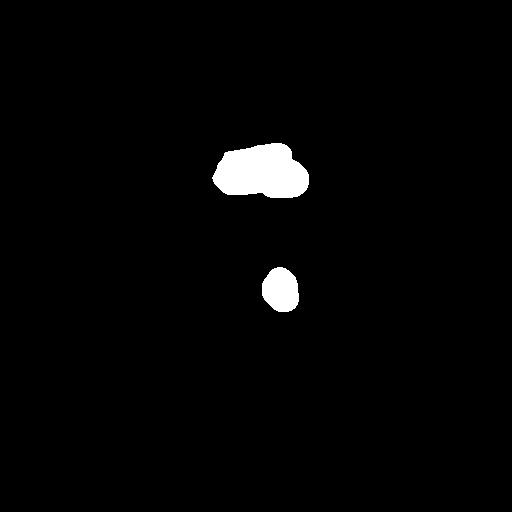

In [2]:
##  Loading Image

img = cv2.imread('7UynE.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(img)
cv2_imshow(img_gray)

## Thresholding

### Simple Thresholding

First see the histogram value and use the global minima as the value instead of 127 which is a used for thresholding.

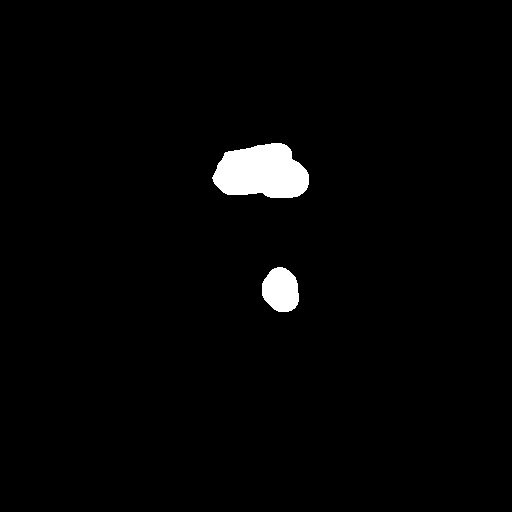

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_,binary_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
_, binary_inv_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
_, trunc_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
_, torenzo_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
_, torenzo_inv_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

cv2_imshow(binary_thresh)


### Adaptive Thresholding

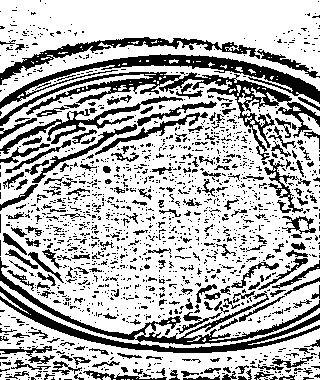

In [ ]:
adaptive_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2_imshow(adaptive_mean)

### Thresholding in HSV

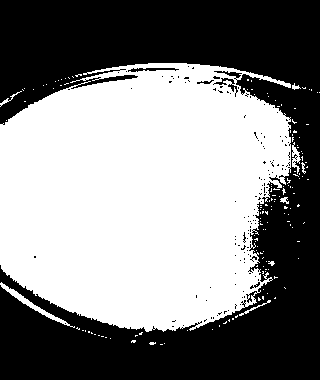

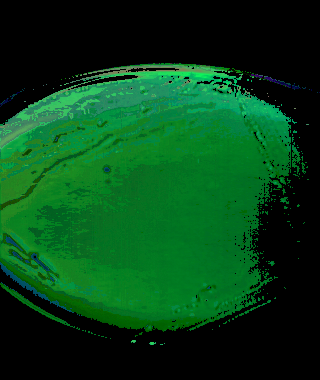

In [ ]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_bound = np.array([0, 120, 70])
upper_bound = np.array([100, 255, 255])

mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

out_img = cv2.bitwise_and(img, hsv_img, mask=mask)

cv2_imshow(mask)
cv2_imshow(out_img)

## Otsu Binarization

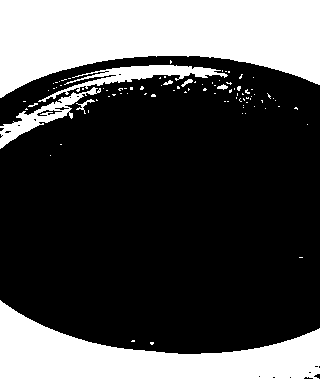

In [ ]:
_, otsu_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(otsu_thresh)

### Combine Gaussian Blur with Otsu

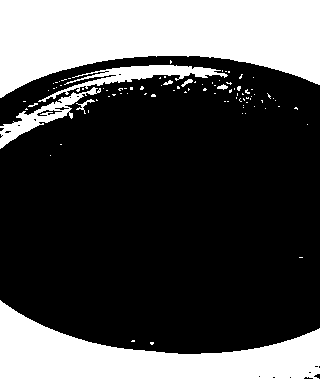

In [ ]:
blurred_img = cv2.GaussianBlur(img_gray, (5, 5), 0)
_, otsu_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(otsu_thresh)

## Watershed Algorithm

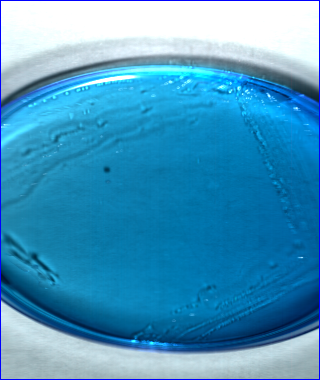

In [ ]:
_, binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)

_, markers = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
markers = np.uint8(markers)

_, markers = cv2.connectedComponents(markers)

markers = markers + 1

binary[binary == 255] = 0

markers = cv2.watershed(img, markers)

img[markers == -1] = [255, 0, 0]

cv2_imshow(img)

Number of labels (including background): 3
Labeled Image:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


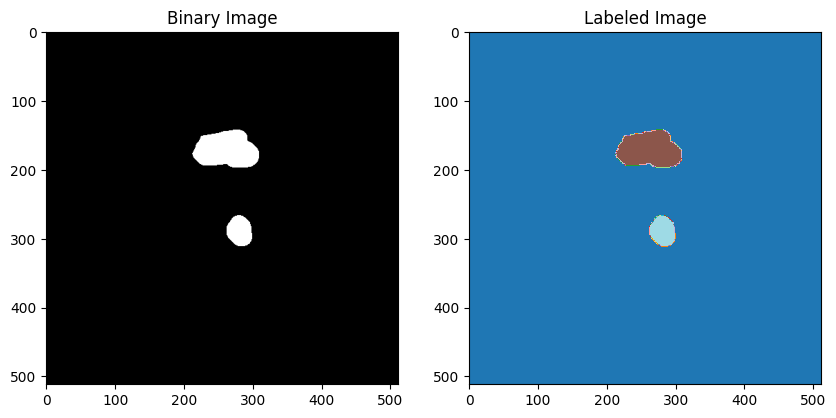

In [6]:
## Connected Component Labeling

num_labels, labeled_image = cv2.connectedComponents(binary_thresh)

# Display the results
print(f"Number of labels (including background): {num_labels}")
print("Labeled Image:")
print(labeled_image)

# Visualize
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Binary Image")
plt.imshow(binary_thresh, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Labeled Image")
plt.imshow(labeled_image, cmap="tab20")

plt.show()